In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
from sklearn import linear_model
import seaborn as sns

import math


In [2]:
data = pd.read_csv("followers_top_final.csv")
data

,ranking,username,categories,engagement,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,latest_post,post_type,likes_per_post,comments_per_post,partnership_posts,date_post
0,1,@anitta,"Art', 'Music', 'Singer'",0.7,4.435951,63300000,3019,5191,1,10,1,caroussel,546000,8557,1,9/11/2022
1,1,@anitta,"Art', 'Music', 'Singer'",0.7,4.435951,63300000,3019,5191,1,10,2,caroussel,1400000,14400,0,7/11/2022
2,1,@anitta,"Art', 'Music', 'Singer'",0.7,4.435951,63300000,3019,5191,1,10,3,caroussel,829000,10000,1,5/11/2022
3,2,@whinderssonnunes,"Celebrity', 'Comedy', 'Comedian'",0.7,1.147392,58400000,1859,2785,0,9,1,video,9928,113,1,8/11/2022
4,2,@whinderssonnunes,"Celebrity', 'Comedy', 'Comedian'",0.7,1.147392,58400000,1859,2785,0,9,2,video,632000,5379,0,7/11/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,42,@xandecoelho,"Lifestyle', 'Business'",0.0,21.467532,15400,1391,194,0,0,2,picture,873,39,0,28/8/2022
125,42,@xandecoelho,"Lifestyle', 'Business'",0.0,21.467532,15400,1391,194,0,0,3,caroussel,652,33,0,11/8/2022
126,43,@leopeleja,"Humor', 'Comedy', 'Marketing and Advertising',...",0.0,9.063368,7922,1211,1873,0,11,1,video,190,36,0,19/10/2022
127,43,@leopeleja,"Humor', 'Comedy', 'Marketing and Advertising',...",0.0,9.063368,7922,1211,1873,0,11,2,picture,232,13,0,13/10/2022


In [3]:
print(data["engagement_activity"].max())
print(data["engagement_activity"].min())
print(data["engagement_activity"].mean())
print(data["engagement_activity"].median())


21.46753247
0.258636816
5.894679660279073
4.037955414


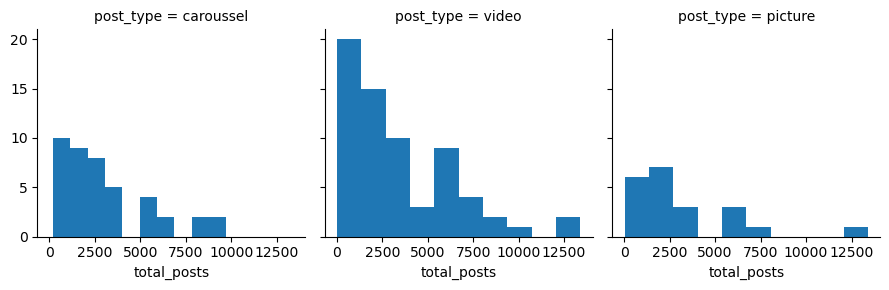

In [4]:
graph = sns.FacetGrid(data, col='post_type')
graph.map(plt.hist, 'total_posts')
plt.show()

In [5]:
print(data["post_type"].value_counts())
print(data["total_posts"].value_counts())

video        66
caroussel    42
picture      21
Name: post_type, dtype: int64
5191     3
1511     3
1917     3
953      3
2288     3
3453     3
2783     3
313      3
2585     3
4959     3
2628     3
7905     3
112      3
2286     3
486      3
1626     3
8529     3
603      3
317      3
194      3
9728     3
3098     3
2785     3
6314     3
5634     3
5378     3
1931     3
1049     3
381      3
7083     3
3300     3
1549     3
6136     3
15       3
6080     3
13397    3
771      3
1981     3
2980     3
28       3
3209     3
1946     3
1873     3
Name: total_posts, dtype: int64


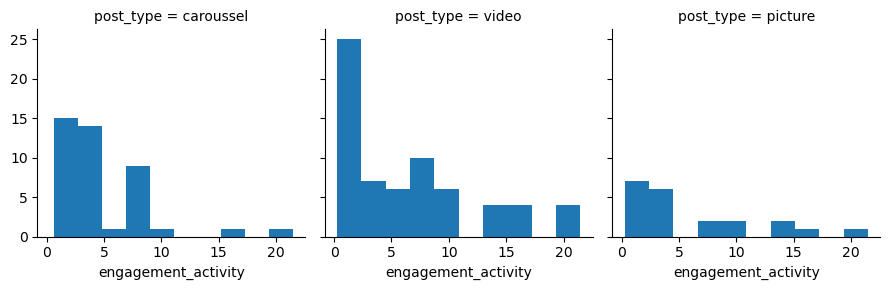

In [6]:
graph2 = sns.FacetGrid(data, col='post_type')
graph2.map(plt.hist, 'engagement_activity')
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


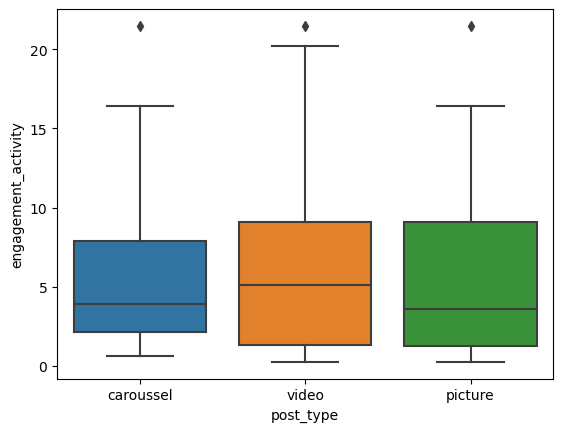

In [7]:
sns.boxplot(data.post_type, data.engagement_activity)
plt.show()

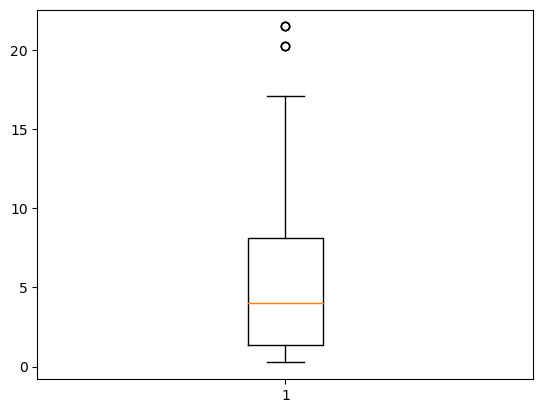

In [8]:
plt.boxplot(data.engagement_activity)
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


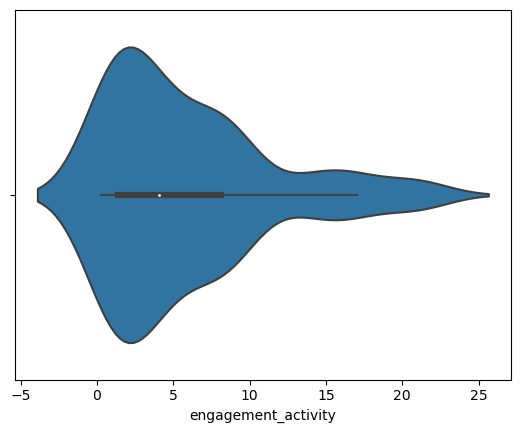

In [9]:
sns.violinplot(data.engagement_activity)
plt.show()

In [ ]:
# sns.pairplot(data)
# plt.show()


In [10]:
data.columns

Index(['ranking', 'username', 'categories', 'engagement',
       'engagement_activity', 'followers', 'following', 'total_posts',
       'channel_associated_on_bio', 'time_on_app_years', 'latest_post',
       'post_type', 'likes_per_post', 'comments_per_post', 'partnership_posts',
       'date_post'],
      dtype='object')

In [10]:
data.dtypes

ranking                        int64
username                      object
alias                         object
categories                    object
engagement                   float64
engagement_activity          float64
followers                    float64
following                      int64
total_posts                    int64
channel_associated_on_bio      int64
time_on_app_years              int64
latest_post                    int64
post_type                     object
likes_per_post                 int64
comments_per_post              int64
partnership_posts              int64
date_post                     object
dtype: object

In [13]:
# average_comments_per_post = data.pivot_table(index=["ranking", "username"], values=["comments_per_post"], aggfunc= {"comments_per_post" : ["sum", "mean", "median", "min", "max"]})
# average_comments_per_post
# average_comments_per_post
# # create new columns then 

comments_per_post                               \
                                            max          mean   median   min   
ranking username                                                               
1       @gessicakayane                     4043   2790.333333   2538.0  1790   
2       @andressasuita                     3084   1519.666667    763.0   712   
3       @leonardo                         29800  10330.333333    965.0   226   
4       @taina                             3294   2598.000000   2373.0  2127   
5       @cocielo                           2956   2895.666667   2896.0  2835   
6       @jujusalimeni                       952    608.333333    873.0     0   
7       @lexa                               907    606.666667    610.0   303   
8       @flaviapavanelli                    451    372.666667    355.0   312   
9       @luvadepedreiro                   50200  27704.333333  31000.0  1913   
10      @kjapa                              361    275.000000    303.0   161   
11      @camilaqueiroz                     1012    815.000000    753.0   680   
12      @marimaria                         2072   1423.666667   1878.0   321   
13      @rafaavitti                         737    299.000000    113.0    47   
14      @zefelipecantor                   49499  23075.000000  17500.0  2226   
15      @caiocastro                         325    220.333333    250.0    86   
16      @mirella                           5685   3614.666667   3145.0  2014   
17      @tirullipa                         9473   4671.666667   4361.0   181   
18      @fernandasouzaoficial              1589    878.333333    928.0   118   
19      @brunogagliasso                    2278   1354.000000    930.0   854   
20      @pefabiodemelo                     4069   2066.666667   1084.0  1047   
21      @rafakalimann                      4491   2219.333333   1835.0   332   
22      @viihtube                          5447   2530.333333   1558.0   586   
23      @gioewbank                         2297   1006.666667    533.0   190   
24      @kevinho                           4646   2955.333333   2522.0  1698   
25      @juliette                         11900   7599.333333   8518.0  2380   
26      @virginia                         22700  12400.333333   8363.0  6138   
27      @larissamanoela                    2141   1219.666667   1434.0    84   
28      @tatawerneck                      48100  26212.666667  30000.0   538   
29      @whinderssonnunes                  5379   1883.000000    157.0   113   
30      @anitta                           14400  10985.666667  10000.0  8557   

                                      
                                 sum  
ranking username                      
1       @gessicakayane          8371  
2       @andressasuita          4559  
3       @leonardo              30991  
4       @taina                  7794  
5       @cocielo                8687  
6       @jujusalimeni           1825  
7       @lexa                   1820  
8       @flaviapavanelli        1118  
9       @luvadepedreiro        83113  
10      @kjapa                   825  
11      @camilaqueiroz          2445  
12      @marimaria              4271  
13      @rafaavitti              897  
14      @zefelipecantor        69225  
15      @caiocastro              661  
16      @mirella               10844  
17      @tirullipa             14015  
18      @fernandasouzaoficial   2635  
19      @brunogagliasso         4062  
20      @pefabiodemelo          6200  
21      @rafakalimann           6658  
22      @viihtube               7591  
23      @gioewbank              3020  
24      @kevinho                8866  
25      @juliette              22798  
26      @virginia              37201  
27      @larissamanoela         3659  
28      @tatawerneck           78638  
29      @whinderssonnunes       5649  
30      @anitta                32957

In [3]:
# average_comments_per_post.columns

In [15]:
# average_comments_per_post.columns = average_comments_per_post.columns.droplevel()

In [16]:
# average_comments_per_post.columns = ["max_comment", "mean_comment", "median_comment", "min_comment", "sum_comment"]

In [17]:
# average_comments_per_post.loc[1]["sum_comment"]

username
@gessicakayane    8371
Name: sum_comment, dtype: int64

In [18]:
# average_comments_per_post

,,max_comment,mean_comment,median_comment,min_comment,sum_comment
ranking,username,,,,,
1,@gessicakayane,4043,2790.333333,2538.0,1790,8371
2,@andressasuita,3084,1519.666667,763.0,712,4559
3,@leonardo,29800,10330.333333,965.0,226,30991
4,@taina,3294,2598.000000,2373.0,2127,7794
5,@cocielo,2956,2895.666667,2896.0,2835,8687
6,@jujusalimeni,952,608.333333,873.0,0,1825
7,@lexa,907,606.666667,610.0,303,1820
8,@flaviapavanelli,451,372.666667,355.0,312,1118
9,@luvadepedreiro,50200,27704.333333,31000.0,1913,83113


In [19]:
# average_likes_per_post = data.pivot_table(index=["ranking", "username"], values=["likes_per_post"], aggfunc= {"likes_per_post" : ["sum", "mean", "median", "min", "max"]})
# average_likes_per_post
# # create new columns then 

likes_per_post                           \
                                         max          mean     median   
ranking username                                                        
1       @gessicakayane                401000  2.828667e+05   351000.0   
2       @andressasuita                505000  2.098000e+05    89900.0   
3       @leonardo                     874000  3.182000e+05    69900.0   
4       @taina                        642000  4.466667e+05   486000.0   
5       @cocielo                      697000  5.793333e+05   596000.0   
6       @jujusalimeni                 211000  1.400000e+05   108000.0   
7       @lexa                         163000  8.826667e+04    64200.0   
8       @flaviapavanelli               70100  3.963333e+04    25300.0   
9       @luvadepedreiro              1700000  1.029333e+06  1200000.0   
10      @kjapa                        280000  2.273333e+05   274000.0   
11      @camilaqueiroz                336000  2.393333e+05   199000.0   
12      @marimaria                   1100000  5.048000e+05   353000.0   
13      @rafaavitti                   193000  7.807067e+04    34700.0   
14      @zefelipecantor              5200000  3.151000e+06  3400000.0   
15      @caiocastro                    28600  1.710833e+04    16600.0   
16      @mirella                      797000  5.470000e+05   450000.0   
17      @tirullipa                    522000  1.984223e+05    66300.0   
18      @fernandasouzaoficial         216000  1.135000e+05   114000.0   
19      @brunogagliasso               105000  9.136667e+04    93100.0   
20      @pefabiodemelo                 83077  6.052567e+04    64500.0   
21      @rafakalimann                 250000  9.806667e+04    28600.0   
22      @viihtube                    1500000  6.246603e+05   286981.0   
23      @gioewbank                     93700  5.056667e+04    38500.0   
24      @kevinho                      250000  1.954667e+05   242000.0   
25      @juliette                     777000  3.820000e+05   338000.0   
26      @virginia                    3700000  2.100000e+06  1500000.0   
27      @larissamanoela               451000  1.598737e+05    24500.0   
28      @tatawerneck                 2300000  1.180667e+06  1200000.0   
29      @whinderssonnunes             632000  2.214760e+05    22500.0   
30      @anitta                      1400000  9.250000e+05   829000.0   

                                                 
                                   min      sum  
ranking username                                 
1       @gessicakayane           96600   848600  
2       @andressasuita           34500   629400  
3       @leonardo                10700   954600  
4       @taina                  212000  1340000  
5       @cocielo                445000  1738000  
6       @jujusalimeni           101000   420000  
7       @lexa                    37600   264800  
8       @flaviapavanelli         23500   118900  
9       @luvadepedreiro         188000  3088000  
10      @kjapa                  128000   682000  
11      @camilaqueiroz          183000   718000  
12      @marimaria               61400  1514400  
13      @rafaavitti               6512   234212  
14      @zefelipecantor         853000  9453000  
15      @caiocastro               6125    51325  
16      @mirella                394000  1641000  
17      @tirullipa                6967   595267  
18      @fernandasouzaoficial    10500   340500  
19      @brunogagliasso          76000   274100  
20      @pefabiodemelo           34000   181577  
21      @rafakalimann            15600   294200  
22      @viihtube                87000  1873981  
23      @gioewbank               19500   151700  
24      @kevinho                 94400   586400  
25      @juliette                31000  1146000  
26      @virginia              1100000  6300000  
27      @larissamanoela           4121   479621  
28      @tatawerneck             42000  3542000  
29      @whinderssonnunes         9928   664428  
30      @anitta     

In [20]:
# average_likes_per_post.columns

MultiIndex([('likes_per_post',    'max'),
            ('likes_per_post',   'mean'),
            ('likes_per_post', 'median'),
            ('likes_per_post',    'min'),
            ('likes_per_post',    'sum')],
           )

In [21]:
# average_likes_per_post.columns = average_likes_per_post.columns.droplevel()

In [22]:
# average_likes_per_post.columns = ["max_like", "mean_like", "median_like", "min_like", "sum_like"]

In [23]:
# average_likes_per_post.loc[1]["sum_like"]

username
@gessicakayane    848600
Name: sum_like, dtype: int64

In [24]:
# engagement = (average_likes_per_post.loc[1]["sum_like"] + average_comments_per_post.loc[1]["sum_comment"]) * 100 / (data.loc[1]["followers"] * 1000000)
# engagement

username
@gessicakayane    5.637967
dtype: float64

In [25]:
# sum_of_likes = []

# for number in average_likes_per_post["sum_like"]:
#     sum_of_likes.append(number)

# sum_of_likes

[848600,
 629400,
 954600,
 1340000,
 1738000,
 420000,
 264800,
 118900,
 3088000,
 682000,
 718000,
 1514400,
 234212,
 9453000,
 51325,
 1641000,
 595267,
 340500,
 274100,
 181577,
 294200,
 1873981,
 151700,
 586400,
 1146000,
 6300000,
 479621,
 3542000,
 664428,
 2775000]

In [26]:
# sum_of_comments = []

# for number in average_comments_per_post["sum_comment"]:
#     sum_of_comments.append(number)

# sum_of_comments

[8371,
 4559,
 30991,
 7794,
 8687,
 1825,
 1820,
 1118,
 83113,
 825,
 2445,
 4271,
 897,
 69225,
 661,
 10844,
 14015,
 2635,
 4062,
 6200,
 6658,
 7591,
 3020,
 8866,
 22798,
 37201,
 3659,
 78638,
 5649,
 32957]

In [27]:
# likes_and_comments = [like + comment for like, comment in zip(sum_of_likes, sum_of_comments)]
# likes_and_comments

[856971,
 633959,
 985591,
 1347794,
 1746687,
 421825,
 266620,
 120018,
 3171113,
 682825,
 720445,
 1518671,
 235109,
 9522225,
 51986,
 1651844,
 609282,
 343135,
 278162,
 187777,
 300858,
 1881572,
 154720,
 595266,
 1168798,
 6337201,
 483280,
 3620638,
 670077,
 2807957]

In [29]:
# total_followers = data.pivot_table(index=["ranking","username"], values=["followers"], aggfunc= {"followers" : ["mean"]})
# total_followers

,,followers
,,mean
ranking,username,
1,@gessicakayane,15.2
2,@andressasuita,15.7
3,@leonardo,15.9
4,@taina,16.1
5,@cocielo,16.8
6,@jujusalimeni,17.2
7,@lexa,18.1
8,@flaviapavanelli,18.4


In [30]:
# total_followers.columns

MultiIndex([('followers', 'mean')],
           )

In [31]:
# total_followers.columns = total_followers.columns.droplevel()

In [32]:
# total_followers.columns = ["total_followers"]

In [33]:
# total_followers

,,total_followers
ranking,username,
1,@gessicakayane,15.2
2,@andressasuita,15.7
3,@leonardo,15.9
4,@taina,16.1
5,@cocielo,16.8
6,@jujusalimeni,17.2
7,@lexa,18.1
8,@flaviapavanelli,18.4
9,@luvadepedreiro,18.6


In [34]:
# followers_multiplied = []

# for number in total_followers["total_followers"]:
#     followers_multiplied.append(number * 1000000)

# followers_multiplied

[15199999.999999998,
 15699999.999999998,
 15900000.0,
 16100000.000000002,
 16800000.0,
 17200000.0,
 18100000.0,
 18400000.0,
 18600000.0,
 19000000.0,
 18800000.0,
 19000000.0,
 19300000.0,
 19600000.0,
 20100000.0,
 20300000.0,
 21399999.999999996,
 21700000.0,
 21700000.0,
 22100000.000000004,
 22399999.999999996,
 24600000.000000004,
 25700000.0,
 28000000.0,
 33800000.0,
 38600000.0,
 45700000.00000001,
 53000000.0,
 58400000.0,
 63299999.99999999]

In [35]:
# engagement = [(likes_comments * 100) / followers for likes_comments, followers in zip(likes_and_comments, followers_multiplied)]
# engagement

[5.637967105263159,
 4.037955414012739,
 6.198685534591195,
 8.371391304347824,
 10.396946428571429,
 2.452470930232558,
 1.4730386740331491,
 0.6522717391304348,
 17.048994623655915,
 3.5938157894736844,
 3.832154255319149,
 7.993005263157895,
 1.2181813471502592,
 48.582780612244896,
 0.258636815920398,
 8.137162561576355,
 2.8471121495327107,
 1.5812672811059907,
 1.281852534562212,
 0.8496696832579184,
 1.3431160714285717,
 7.648666666666665,
 0.602023346303502,
 2.12595,
 3.45798224852071,
 16.417619170984455,
 1.0575054704595184,
 6.831392452830189,
 1.1473921232876712,
 4.435951026856241]

In [ ]:
# data["engagement_activity"] = np.array(engagement)
# data

# did manually

In [11]:
data.skew()

# checking if negative or positive skew 

C:\Users\Cristiana\AppData\Local\Temp\ipykernel_14148\846527599.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


ranking                      0.000000
engagement                   2.584288
engagement_activity          1.273515
followers                    1.072294
following                    0.837986
total_posts                  1.395286
channel_associated_on_bio   -0.141527
time_on_app_years           -0.864870
latest_post                  0.000000
likes_per_post               3.753744
comments_per_post            4.176843
partnership_posts            0.753224
dtype: float64

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


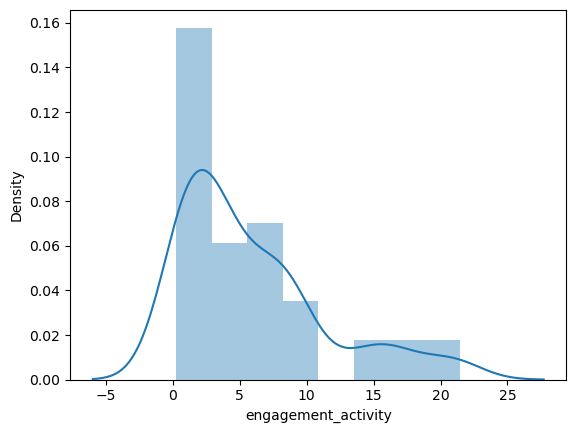

In [12]:
sns.distplot(data["engagement_activity"])
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


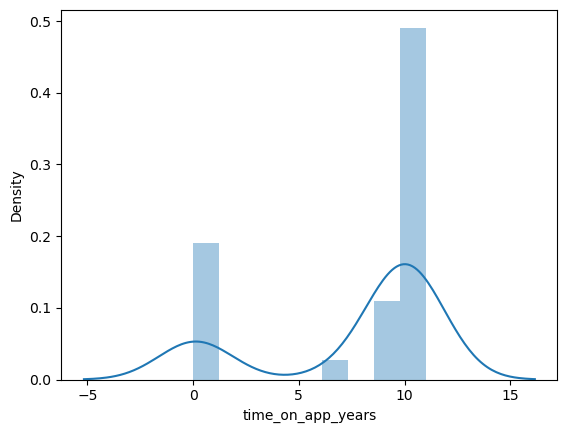

In [14]:
sns.distplot(data["time_on_app_years"])
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


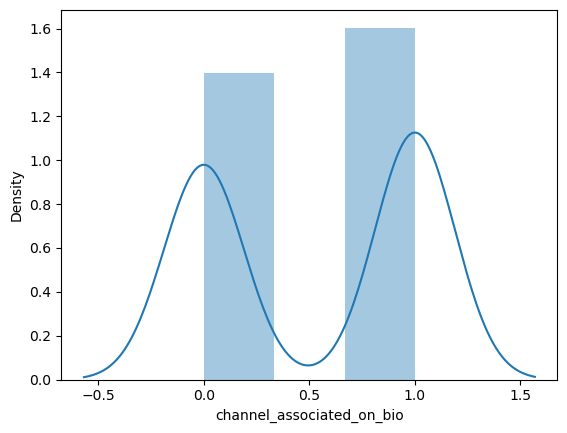

In [13]:
sns.distplot(data["channel_associated_on_bio"])
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


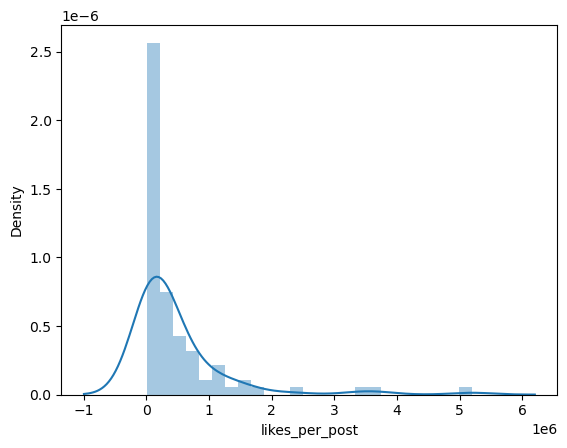

In [16]:
sns.distplot(data["likes_per_post"])
plt.show()

# correlations

In [14]:
data.columns

Index(['ranking', 'username', 'categories', 'engagement',
       'engagement_activity', 'followers', 'following', 'total_posts',
       'channel_associated_on_bio', 'time_on_app_years', 'latest_post',
       'post_type', 'likes_per_post', 'comments_per_post', 'partnership_posts',
       'date_post'],
      dtype='object')

In [15]:
data.select_dtypes('number').head(5)

,ranking,engagement,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,latest_post,likes_per_post,comments_per_post,partnership_posts
0,1,0.7,4.435951,63300000,3019,5191,1,10,1,546000,8557,1
1,1,0.7,4.435951,63300000,3019,5191,1,10,2,1400000,14400,0
2,1,0.7,4.435951,63300000,3019,5191,1,10,3,829000,10000,1
3,2,0.7,1.147392,58400000,1859,2785,0,9,1,9928,113,1
4,2,0.7,1.147392,58400000,1859,2785,0,9,2,632000,5379,0


In [16]:
data[["engagement_activity", "followers", "following", "total_posts", "channel_associated_on_bio", "time_on_app_years", "likes_per_post", "comments_per_post", "partnership_posts"]].corr()


,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,likes_per_post,comments_per_post,partnership_posts
engagement_activity,1.000000,-0.285031,-0.179089,-0.487967,-0.104459,-0.387970,0.276438,0.211073,-0.127571
followers,-0.285031,1.000000,0.290567,0.242326,0.066646,0.249848,0.444603,0.352503,0.206761
following,-0.179089,0.290567,1.000000,0.210768,-0.225170,0.152762,-0.060733,-0.057095,0.202052
total_posts,-0.487967,0.242326,0.210768,1.000000,0.090002,0.313450,-0.053209,-0.034745,-0.004454
channel_associated_on_bio,-0.104459,0.066646,-0.225170,0.090002,1.000000,0.025752,0.034579,0.070078,0.117241
time_on_app_years,-0.387970,0.249848,0.152762,0.313450,0.025752,1.000000,0.027209,0.034241,0.015524
likes_per_post,0.276438,0.444603,-0.060733,-0.053209,0.034579,0.027209,1.000000,0.724105,-0.066592
comments_per_post,0.211073,0.352503,-0.057095,-0.034745,0.070078,0.034241,0.724105,1.000000,0.037334
partnership_posts,-0.127571,0.206761,0.202052,-0.004454,0.117241,0.015524,-0.066592,0.037334,1.000000


In [17]:
# heatmap 

plt.figure(figsize=(6,4))
sns.heatmap(data.corr())

<AxesSubplot:>

# covariances

In [18]:
print(data["engagement_activity"].cov(data["likes_per_post"]))
print(data["engagement_activity"].cov(data["comments_per_post"]))

# With a negative covariance, that means what we already noticed: 
# when one variable goes up, the other goes down. 

762535.8372802163
9165.622959654323


# Spearman correlation 

Because we just care to know if one variable increase, what happens to the other 
does not increase, decrease, of affect it at all.
The magnitude of the influence is not important.

Ex.: I don't care to see if I study 10 more minutes, the grade increase 1 point on grade 
I care if I study more, I get better grades.

In [19]:
# let's try to correlate number with number?

# examples
# followers with avg comments 
# followers with avg likes 
# followers with engagement 


# Logistic Regression Model 

In [20]:
data.columns

Index(['ranking', 'username', 'categories', 'engagement',
       'engagement_activity', 'followers', 'following', 'total_posts',
       'channel_associated_on_bio', 'time_on_app_years', 'latest_post',
       'post_type', 'likes_per_post', 'comments_per_post', 'partnership_posts',
       'date_post'],
      dtype='object')

In [33]:
data.sample(5)

,ranking,username,alias,categories,engagement,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,latest_post,post_type,likes_per_post,comments_per_post,partnership_posts,date_post
16,6,@jujusalimeni,jujusalimeni,"Art', 'Modeling'",0.20,2.452471,17.2,1013,9728,1,11,2,caroussel,211000,873,0,7/11/2022
55,19,@brunogagliasso,brunogagliasso,"Celebrity', 'Actors', 'Celebrities', 'Humor'",0.18,1.281853,21.7,4240,6080,0,10,2,picture,105000,854,0,7/11/2022
70,24,@kevinho,kevinho,"Art', 'Music', 'Singer'",0.15,2.125950,28.0,1004,381,1,9,2,caroussel,94400,2522,0,9/8/2022
54,19,@brunogagliasso,brunogagliasso,"Celebrity', 'Actors', 'Celebrities', 'Humor'",0.18,1.281853,21.7,4240,6080,0,10,1,picture,93100,2278,1,8/11/2022
29,10,@kjapa,kjapa,Actors',6.90,3.593816,19.0,540,28,0,0,3,picture,274000,303,1,8/10/2022


In [21]:
X = data[['engagement_activity','followers', 'following', 'total_posts', 'likes_per_post', 'comments_per_post']]
y = data['channel_associated_on_bio']

# type of engagement will be generated by 2 bins based on : 
# from 0 to 5 : low engagement = 0 
# from 5 to 10 or higher : high engagement = 1 
# we will have to generate this new column 


X.head()

,engagement_activity,followers,following,total_posts,likes_per_post,comments_per_post
0,4.435951,63300000,3019,5191,546000,8557
1,4.435951,63300000,3019,5191,1400000,14400
2,4.435951,63300000,3019,5191,829000,10000
3,1.147392,58400000,1859,2785,9928,113
4,1.147392,58400000,1859,2785,632000,5379


In [22]:
#  create our model 

logistic = linear_model.LogisticRegression()

In [23]:
# train the model 

logistic.fit(X,y)

LogisticRegression()

In [24]:
# evaluate the model 

logistic.score(X,y)

# accuracy score : near 65%

0.5348837209302325

In [25]:
from sklearn.preprocessing import StandardScaler

# create the scaler 

scaler = StandardScaler()

# fit our data to the standard scaler 
scaler.fit(X)

# transform the data
scaler.transform(X)

array([[-2.66078798e-01,  2.90263884e+00,  1.64759843e+00,
         6.82548146e-01,  5.55992669e-01,  6.56808865e-01],
       [-2.66078798e-01,  2.90263884e+00,  1.64759843e+00,
         6.82548146e-01,  2.26655397e+00,  1.40025536e+00],
       [-2.66078798e-01,  2.90263884e+00,  1.64759843e+00,
         6.82548146e-01,  1.12284144e+00,  8.40412030e-01],
       [-8.65927035e-01,  2.58885277e+00,  3.86787015e-01,
        -1.39245287e-01, -5.17759110e-01, -4.17581379e-01],
       [-8.65927035e-01,  2.58885277e+00,  3.86787015e-01,
        -1.39245287e-01,  7.28250598e-01,  2.52449296e-01],
       [-8.65927035e-01,  2.58885277e+00,  3.86787015e-01,
        -1.39245287e-01, -4.92577404e-01, -4.11982946e-01],
       [ 1.70860713e-01,  2.24304770e+00,  1.02914869e+00,
         8.33859239e-01, -4.53518920e-01, -3.63505603e-01],
       [ 1.70860713e-01,  2.24304770e+00,  1.02914869e+00,
         8.33859239e-01,  1.86595413e+00,  3.38515444e+00],
       [ 1.70860713e-01,  2.24304770e+00,  1.029

In [26]:
scaled_X = pd.DataFrame(scaler.transform(X), columns=X.columns)
scaled_X

,engagement_activity,followers,following,total_posts,likes_per_post,comments_per_post
0,-0.266079,2.902639,1.647598,0.682548,0.555993,0.656809
1,-0.266079,2.902639,1.647598,0.682548,2.266554,1.400255
2,-0.266079,2.902639,1.647598,0.682548,1.122841,0.840412
3,-0.865927,2.588853,0.386787,-0.139245,-0.517759,-0.417581
4,-0.865927,2.588853,0.386787,-0.139245,0.728251,0.252449
...,...,...,...,...,...,...
124,2.840560,-1.149979,-0.121885,-1.024227,-0.535896,-0.426997
125,2.840560,-1.149979,-0.121885,-1.024227,-0.536339,-0.427760
126,0.577983,-1.150458,-0.317528,-0.450748,-0.537264,-0.427379
127,0.577983,-1.150458,-0.317528,-0.450748,-0.537180,-0.430305
